In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# 1. 데이터 준비

In [28]:
# CSV 파일을 읽어와서 데이터프레임으로 변비비
df = pd.read_csv('../data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name'] 

In [29]:
# 2. 데이터 탐색

In [30]:
# horsepower 열의 자료형 변경 (문자형 ->실수형)
df['horsepower'].replace('?', np.nan, inplace=True)     # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)  # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')     # 문자형을 실수형으로 변홖
print(df.describe()) # 데이터 통계 요약정보 확인

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000

In [31]:
# 3. 분석에 활용할 속성(feature 또는 variable) 선택

In [32]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
x=ndf[['weight']]   # 독립 변수 x
y=ndf['mpg']        # 종속 변수 y

In [33]:
# 4. 훈련 데이터 / 검증 데이터 분할

In [34]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', x_train.shape)   # 훈련 데이터: (274, 1)
print('검증 데이터: ', x_test.shape)    # 검증 데이터: (118, 1)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


In [35]:
# 5. 모델 학습 및 모델 검증 

In [36]:
# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression    # 선형회귀분석
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2)             # 2차항 적용
x_train_poly = poly.fit_transform(x_train)      # x_train 데이터를 2차항으로 변환

print('원 데이터: ', x_train.shape)                 # 원 데이터: (274, 1)
print('2차항 변환 데이터: ', x_train_poly.shape)    # 2차항 변환 데이터: (274, 3)
# x_train의 1개의 열이 x_train_poly 에서는 3개의 열로 늘어난

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [37]:
# train data를 가지고 모델 학습
model = LinearRegression()          # 모델 만들기
model.fit(x_train_poly, y_train)    # 모델 학습

# 학습을 마친 모델에 test data를 적용하여 결정계수(R-제곱) 계산
x_test_poly = poly.fit_transform(x_test)        # x_test 데이터를 2차항으로 변환
r_square = model.score(x_test_poly, y_test)     # 결정계수 구하기
print(r_square) 
# 결정계수 : 0.7087009262975481

0.7087009262975481


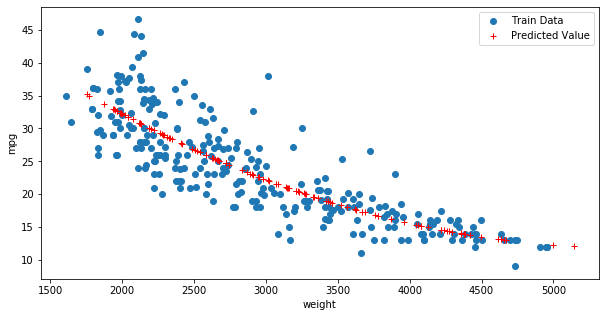

In [39]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat_test = pr.predict(x_test_poly)        # test data로 예측하기

fig = plt.figure(figsize=(10, 5))           # 그래프 크기 설정
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_train, y_train, 'o', label='Train Data')          # train data의 산점도
ax.plot(x_test, y_hat_test, 'r+', label='Predicted Value')  # 모델이 학습핚 회귀선
ax.legend(loc='best')       # 범례 설정
plt.xlabel('weight')        # x축 라벨
plt.ylabel('mpg')           # y축 라벨
plt.show()

* 단순회귀분석 결정계수 : 0.6822458558299325
* 다항회귀분석 결정계수 : 0.7087009262975481
* 단순회귀분석을 했을때 보다 다항회귀분석을 했을때 결정계수값이 높아진 것에서 알수 있듯이 직선보다 곡선으로 만들어진 회귀선이 데이터 패턴을 더욱 더 잘 설명한다고 할 수 있다.
* train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 : 곡선모양의 회귀선

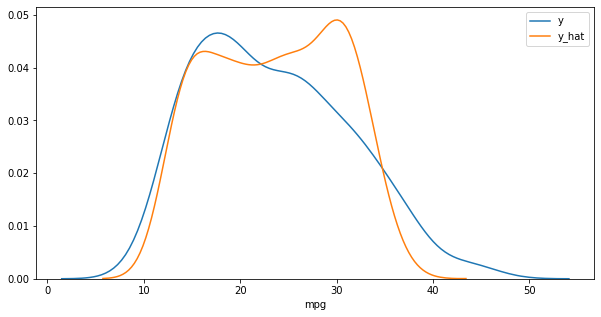

In [40]:
# 실제값 y와 예측값 y_hat 의 분포 차이 비교
# 모델에 전체 x데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
x_ploy = poly.fit_transform(x)      # x 데이터를 2차항으로 변홖
y_hat = pr.predict(x_ploy)          # 예측값 구하기

# displot() 함수 : 히스토그램 + 커널밀도함수
plt.figure(figsize=(10, 5))               # 그래프 크기 설정
ax1 = sns.distplot(y, hist=False, label="y")                # 실제값
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1) # 예측값
plt.show()

* 단순회귀분석의 결과와 비교할 때 데이터가 어느 한쪽으로 편향되는 경향이 상당히 감소한 것을 알 수 있다. 
* 다항회귀분석이 더 적합한 모델이라고 볼 수 있다.
* 실제값 y와 예측값 y_hat 의 분포 차이 비교